Student Number:24205198 

## 1. Data Characterisation and Preprocessing

In [3]:
import pandas as pd

Read a file, view the file description, return all columns of the file, and display the first five lines of the file

In [5]:
df = pd.read_csv("employees.csv")
df.set_index('employee_id', inplace=True)
print(df.describe())
print("return all colums：",df.columns)
df.head()

               age         salary  company_years  career_years     distance
count  1365.000000    1365.000000    1365.000000   1311.000000  1365.000000
mean     36.710623   75948.090110       5.761172      9.829138    19.129670
std       9.951374   54929.608786       5.508467      7.884555    25.753712
min      18.000000   11640.000000      -1.000000      1.000000     3.000000
25%      29.000000   33746.000000       1.000000      4.000000     3.000000
50%      36.000000   57739.000000       5.000000      8.000000     9.000000
75%      43.000000   97044.000000       8.000000     13.000000    22.000000
max      62.000000  244622.000000      34.000000     39.000000   121.000000
return all colums： Index(['department', 'job_level', 'age', 'salary', 'company_years',
       'career_years', 'hiring_source', 'education_level', 'recently_promoted',
       'distance', 'work_from_home', 'travel_frequently', 'leave'],
      dtype='object')


,department,job_level,age,salary,company_years,career_years,hiring_source,education_level,recently_promoted,distance,work_from_home,travel_frequently,leave
employee_id,,,,,,,,,,,,,
EMP0310,IT,Mid,37,105129.0,10,10.0,Agency,Undergrad Degree,True,3,False,Yes,False
EMP1273,Finance,Junior,61,31902.0,1,13.0,Direct,Undergrad Degree,True,39,False,No,False
EMP0391,Sales,Junior,43,29722.0,9,13.0,Referral,NaN,False,14,True,No,False
EMP1372,Finance,Junior,29,33196.0,1,1.0,Direct,Undergrad Degree,False,9,True,Yes,True
EMP1208,Finance,Junior,29,32885.0,1,6.0,Agency,Undergrad Degree,False,3,False,Yes,True


Check for duplicates and print out the duplicate data

In [73]:
duplicates = df.duplicated().sum()
print(duplicates)
if duplicates > 0:
    print("repeat line：")
    print(df[df.duplicated()])

0


Print the values under each feature and count their occurrences

In [8]:
categoricals = ["department", "job_level", "hiring_source", "education_level", "recently_promoted", "work_from_home", "travel_frequently"]
for categorical in categoricals:
    print(df[categorical].value_counts())

department
Sales      526
IT         310
HR         282
Finance    247
Name: count, dtype: int64
job_level
Junior    710
Mid       360
Senior    207
Lead       88
Name: count, dtype: int64
hiring_source
Direct         772
Agency         426
Referral       140
Direct Hire     27
Name: count, dtype: int64
education_level
Undergrad Degree    791
Secondary           308
Masters             131
PhD                  45
UG Degree            45
MSc                   5
Name: count, dtype: int64
recently_promoted
False    1164
True      201
Name: count, dtype: int64
work_from_home
False    844
True     489
Name: count, dtype: int64
travel_frequently
No     917
Yes    393
N       41
Y       14
Name: count, dtype: int64


We found that there are four types of N, NO, Y and YES under travel_frequently. This is because some people abbreviate NO to N. So for the convenience of subsequent statistics, we changed N to NO and Y to YES.

In [10]:
df['travel_frequently'] = df['travel_frequently'].replace({'N': 'No', 'No': 'No','Y': 'Yes', 'Yes': 'Yes'})
df['travel_frequently'].value_counts()

travel_frequently
No     958
Yes    407
Name: count, dtype: int64

Return the number of rows and columns in the file, find missing values, and delete the rows with missing values ​​(because the number is large enough and there are only a few missing values, they can be deleted without affecting the statistical results) View the number of rows and columns in the file after deletion

In [12]:
print(df.shape)
print(df.isnull().sum())
df_cleaned = df.dropna()
df = df_cleaned
df.shape

(1365, 13)
department            0
job_level             0
age                   0
salary                0
company_years         0
career_years         54
hiring_source         0
education_level      40
recently_promoted     0
distance              0
work_from_home       32
travel_frequently     0
leave                 0
dtype: int64


(1244, 13)

## 2. Data Analysis 

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

a) Create a plot to determine whether the distribution of the target feature  “leave" in the dataset is evenly balanced.  

leave
False    894
True     350
Name: count, dtype: int64


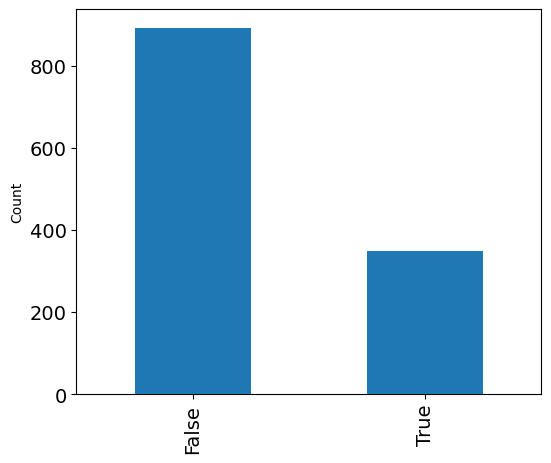

In [16]:
leave_counts = df["leave"].value_counts()
ax = leave_counts.plot(kind = "bar", fontsize=14, figsize=(6,5), zorder=3)
plt.xlabel("")
plt.ylabel("Count")
print(leave_counts)

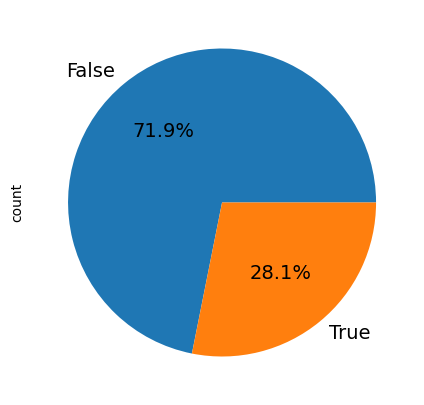

In [17]:
ax = leave_counts.plot(kind = "pie", fontsize=14, figsize=(6,5), autopct = "%.1f%%")

In the above bar chart and pie chart, we can clearly see the distribution of data leaving, False: True = 7: 3

b) Analyse how the values of the target feature “leave” relate to each of the  categorical features in the data

In this assignment, we first analyze the relationship between each feature and leave. We choose to use crosstab to process it, so that we can clearly see how many people leave and how many people stay under this feature. And by plotting this set of data on a stacked bar chart, we can clearly observe the proportion of stays and leave in each attribute under different features.

leave       False  True 
department              
Finance       188     41
HR            169     82
IT            226     56
Sales         311    171


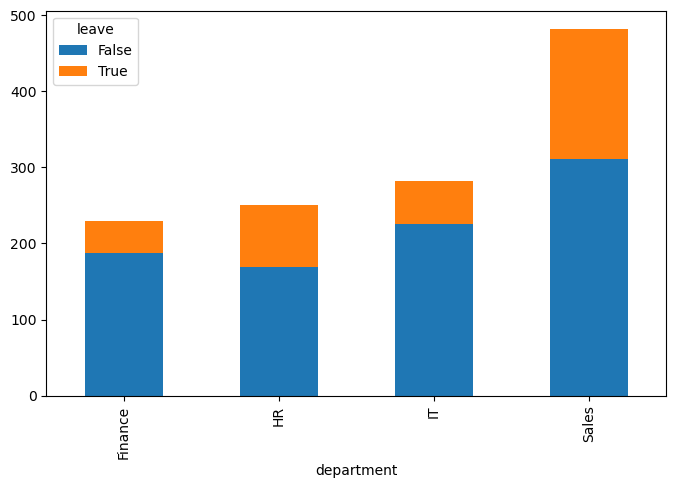

leave      False  True 
job_level              
Junior       415    231
Lead          74      7
Mid          264     66
Senior       141     46


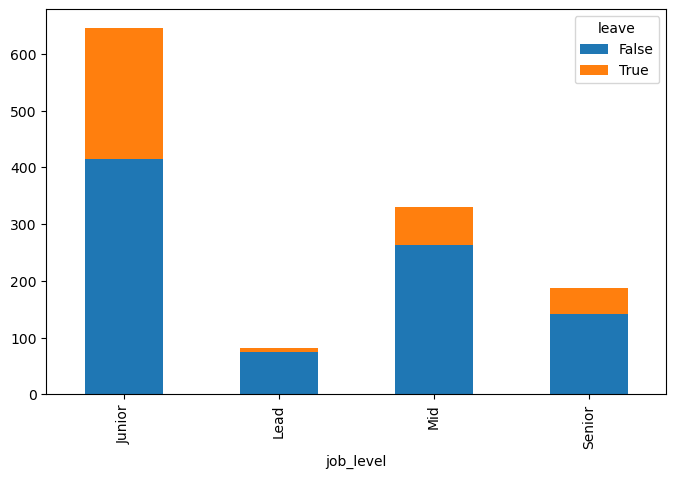

leave          False  True 
hiring_source              
Agency           270    116
Direct           480    219
Direct Hire       24      3
Referral         120     12


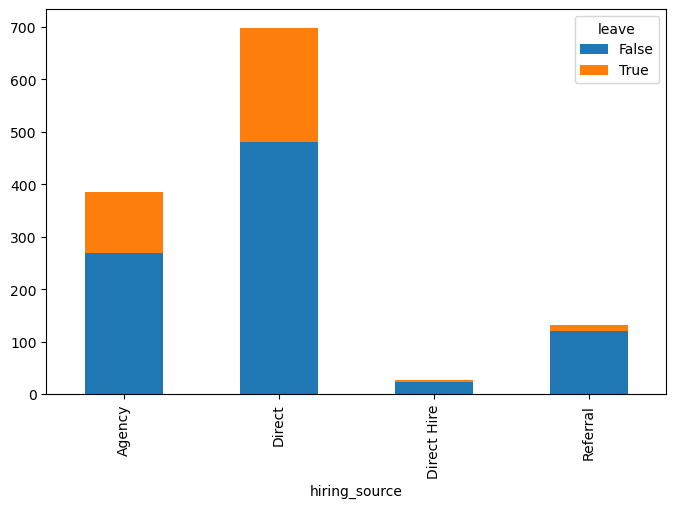

leave             False  True 
education_level               
MSc                   4      1
Masters              61     64
PhD                  12     31
Secondary           218     71
UG Degree            34     10
Undergrad Degree    565    173


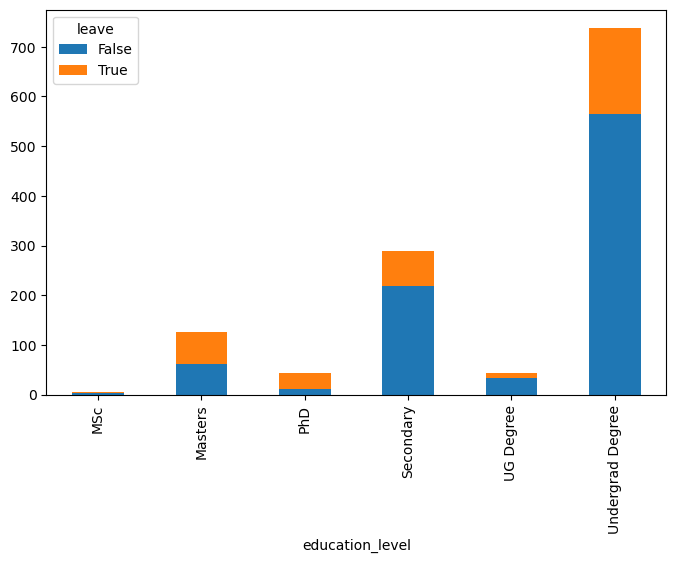

leave              False  True 
recently_promoted              
False                730    332
True                 164     18


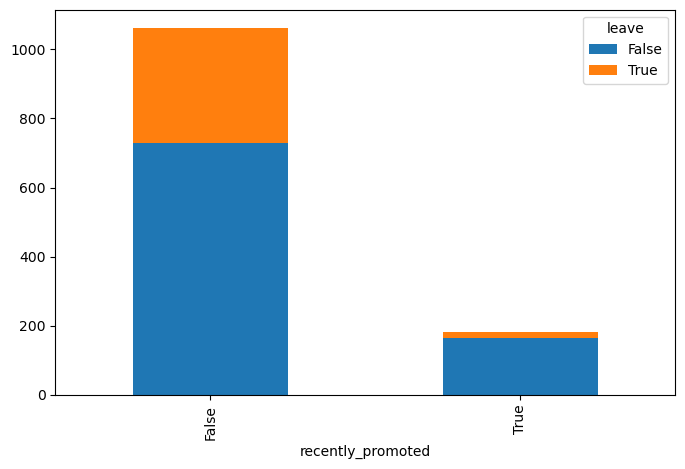

leave           False  True 
work_from_home              
False             511    272
True              383     78


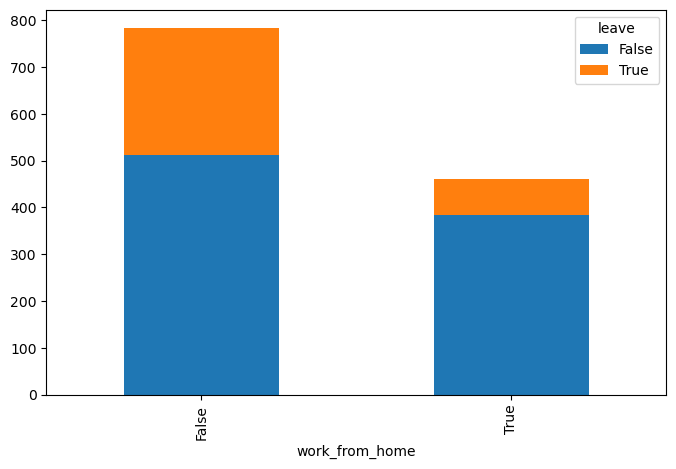

leave              False  True 
travel_frequently              
No                   625    259
Yes                  269     91


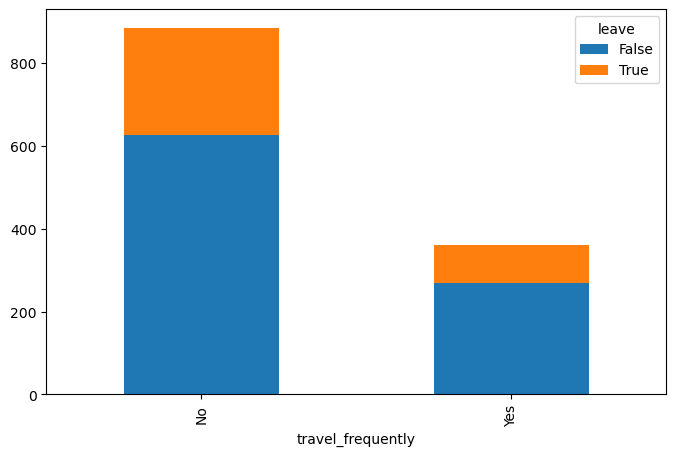

In [21]:
categoricals = ["department","job_level","hiring_source","education_level","recently_promoted","work_from_home","travel_frequently"]
for categorical in categoricals :
    crosstab = pd.crosstab(df[categorical], df["leave"])
    print(crosstab)
    crosstab.plot(kind='bar', stacked=True,figsize=(8, 5))
    plt.show()

Based on these contents, we can observe the proportion of people who stay and leave under each characteristic condition.

c) Analyse how the values of the target feature “leave” relate to each of the  numeric features in the data.

At first I wanted to use the same method to show the relationship between some numerical features and leave, but after some attempts, I found that this idea needs to be modified, because numbers are not like departments, which have only a few values. The values ​​of numbers can be many and different, which makes the crosstab table appear with a lot of rows. So we first need to process these numerical data, such as using intervals to group the data, for example, dividing the age into 18-25, 26-35, 36-45, 46-55, 56-65. These differences make the data more statistically significant and the charts clearer and easier to understand.

First read the maximum and minimum values ​​of each data, and then divide it into intervals

In [26]:
numerics = ["age","salary","company_years","career_years","distance"]
print(df["age"].max())
print(df["age"].min())
print(df["salary"].max())
print(df["salary"].min())
print(df["company_years"].max())
print(df["company_years"].min())
print(df["career_years"].max())
print(df["career_years"].min())
print(df["distance"].max())
print(df["distance"].min())

62
18
244622.0
11640.0
34
-1
39.0
1.0
121
3


leave      False  True 
age_group              
18-25         27    102
26-35        268    155
36-45        360     59
46-55        177     30
56-65         62      4


<Axes: xlabel='age_group'>

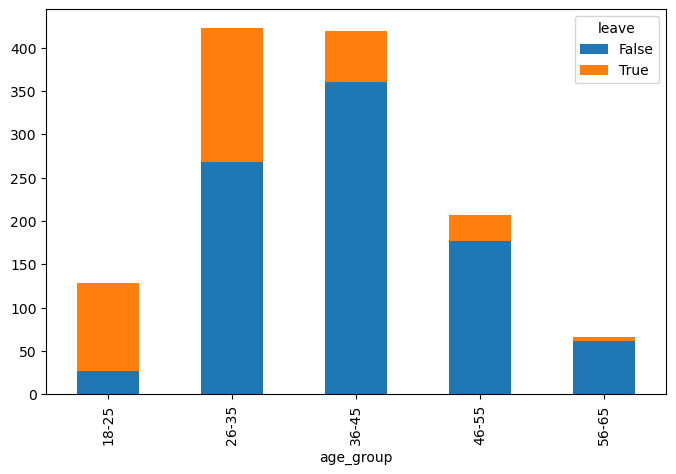

In [27]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group_leave = pd.crosstab(df['age_group'], df['leave'])
print(age_group_leave)
age_group_leave.plot(kind='bar', stacked=True, figsize=(8, 5))

leave          False  True 
salary_group               
10000-25000       26     45
25000-50000      277    162
50000-75000      239     57
75000-100000     112     27
100000-125000     62     33
125000-150000     46      8
150000-200000     58     11
200000-250000     74      7


<Axes: xlabel='salary_group'>

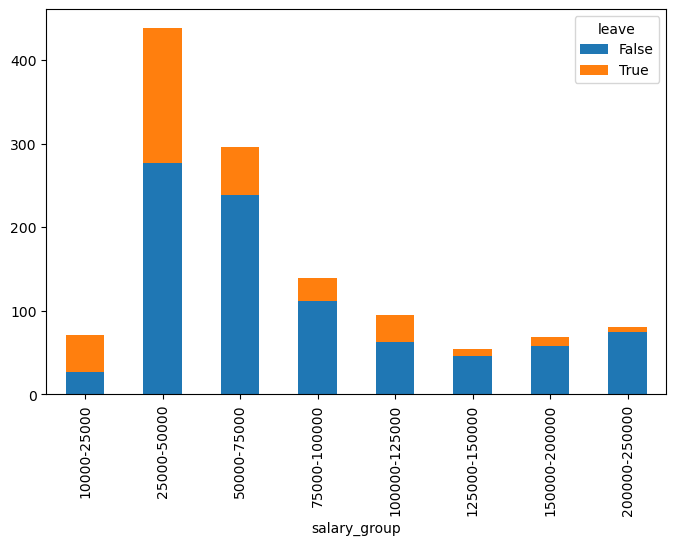

In [28]:
bins = [10000,25000,50000,75000,100000,125000,150000,200000,250000]
labels = ['10000-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-200000','200000-250000']
df['salary_group'] = pd.cut(df['salary'], bins=bins, labels=labels, right=False)
salary_group_leave = pd.crosstab(df['salary_group'], df['leave'])
print(salary_group_leave)
salary_group_leave.plot(kind='bar', stacked=True, figsize=(8, 5))

leave                False  True 
company_years_group              
-1-5                   352    267
5-10                   344     61
10-15                  108     13
15-20                   40      4
20-25                   34      4
25-30                   14      0
30-35                    2      1


<Axes: xlabel='company_years_group'>

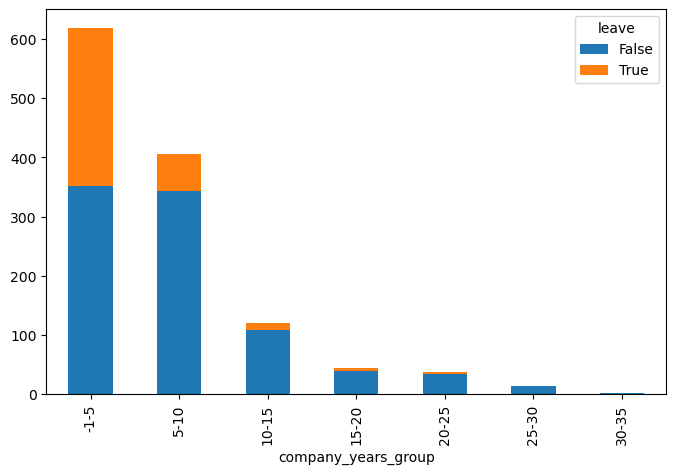

In [29]:
bins = [-1,5,10,15,20,25,30,35]
labels = ['-1-5','5-10','10-15','15-20','20-25','25-30','30-35']
df['company_years_group'] = pd.cut(df['company_years'], bins=bins, labels=labels, right=False)
company_years_group_leave = pd.crosstab(df['company_years_group'], df['leave'])
print(company_years_group_leave)
company_years_group_leave.plot(kind='bar', stacked=True, figsize=(8, 5))

leave               False  True 
career_years_group              
0-5                   151    201
5-10                  288     80
10-15                 212     41
15-20                  90     17
20-25                  80      7
25-30                  43      2
30-35                  21      2
35-40                   9      0


<Axes: xlabel='career_years_group'>

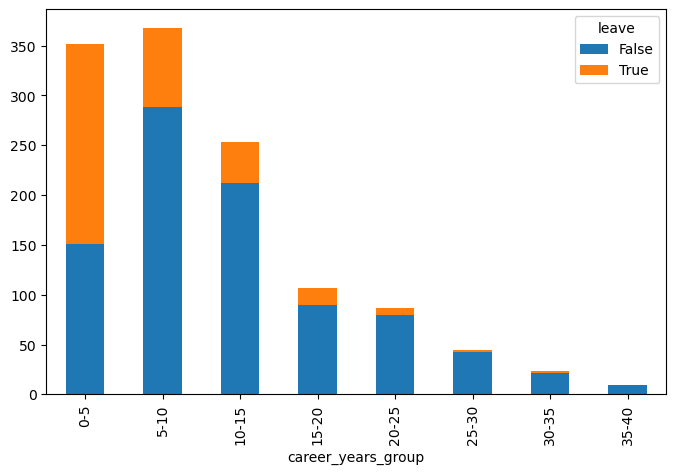

In [30]:
bins = [0,5,10,15,20,25,30,35,40]
labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']
df['career_years_group'] = pd.cut(df['career_years'], bins=bins, labels=labels, right=False)
career_years_group_leave = pd.crosstab(df['career_years_group'], df['leave'])
print(career_years_group_leave)
career_years_group_leave.plot(kind='bar', stacked=True, figsize=(8, 5))

leave           False  True 
distance_group              
0-20              698    192
20-40             133     55
40-60              10     27
60-80              17     31
80-100             22     23
100-125            14     22


<Axes: xlabel='distance_group'>

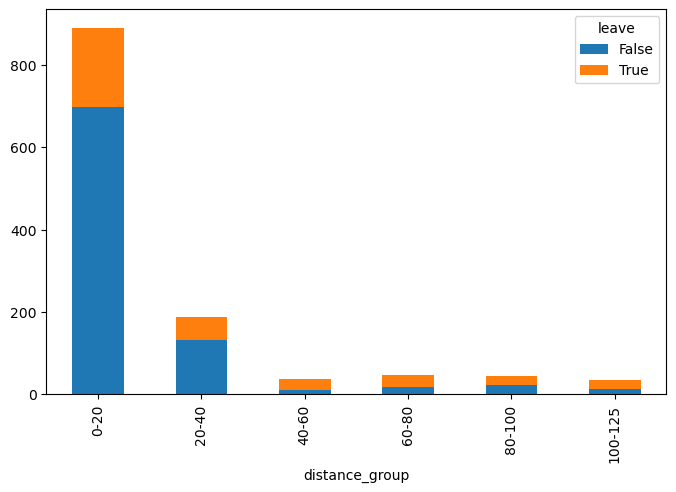

In [31]:
bins = [0,20,40,60,80,100,125]
labels = ['0-20','20-40','40-60','60-80','80-100','100-125']
df['distance_group'] = pd.cut(df['distance'], bins=bins, labels=labels, right=False)
distance_group_leave = pd.crosstab(df['distance_group'], df['leave'])
print(distance_group_leave)
distance_group_leave.plot(kind='bar', stacked=True, figsize=(8, 5))

In this way, we successfully displayed the relationship between these digital data and leave in a crosstab and stacked statistical chart.

## 3. Classification and Evaluation

a) Test the performance of this classifier on the cleaned dataset using all available features.

In [35]:
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

First, delete the group created in the previous task.

In [37]:
df = df.drop(columns=['age_group', 'salary_group','salary_group','company_years_group','career_years_group','distance_group'])
df.head()

,department,job_level,age,salary,company_years,career_years,hiring_source,education_level,recently_promoted,distance,work_from_home,travel_frequently,leave
employee_id,,,,,,,,,,,,,
EMP0310,IT,Mid,37,105129.0,10,10.0,Agency,Undergrad Degree,True,3,False,Yes,False
EMP1273,Finance,Junior,61,31902.0,1,13.0,Direct,Undergrad Degree,True,39,False,No,False
EMP1372,Finance,Junior,29,33196.0,1,1.0,Direct,Undergrad Degree,False,9,True,Yes,True
EMP1208,Finance,Junior,29,32885.0,1,6.0,Agency,Undergrad Degree,False,3,False,Yes,True
EMP0188,HR,Junior,43,50859.0,17,17.0,Direct Hire,Secondary,False,23,False,No,False


Use HistGradientBoostingClassifier to train the data. First, we need to use LabelEncoder to label the non-numeric features, then use 80% of the data for training and 20% for accuracy testing.

In [39]:
le = LabelEncoder()
X = df.drop(columns=["leave"])
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

y = df['leave']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HistGradientBoostingClassifier()
model.fit(X_train,y_train)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.8514056224899599


After testing, the accuracy is 85.1%

Below is a parameter adjustment for an entity employee I created to predict whether the employee will leave

In [42]:
data = {
    'employee_id': ['EMP0310'],
    'department': ['IT'],
    'job_level': ['Mid'],
    'age': [29],
    'salary': [10000],
    'company_years': [3],
    'career_years': [5],
    'hiring_source': ['Agency'],
    'education_level': ['Undergrad Degree'],
    'recently_promoted': [True],
    'distance': [10],
    'work_from_home': [False],
    'travel_frequently': ['Yes'],
}
df1 = pd.DataFrame(data)
df1.set_index('employee_id', inplace=True)
X1 = df1
for col in X1.select_dtypes(include=['object']).columns:
    X1[col] = le.fit_transform(X1[col])
    
predicted = model.predict(X1)
predicted

array([False])

b) Identify some features that could be dropped from the dataset without loss of performance. Test the performance without these features. Comment on the results.

We use permutation_importance to sort the importance of each feature, and use it as a reference for deleting some features with little impact in our task b.

<BarContainer object of 12 artists>

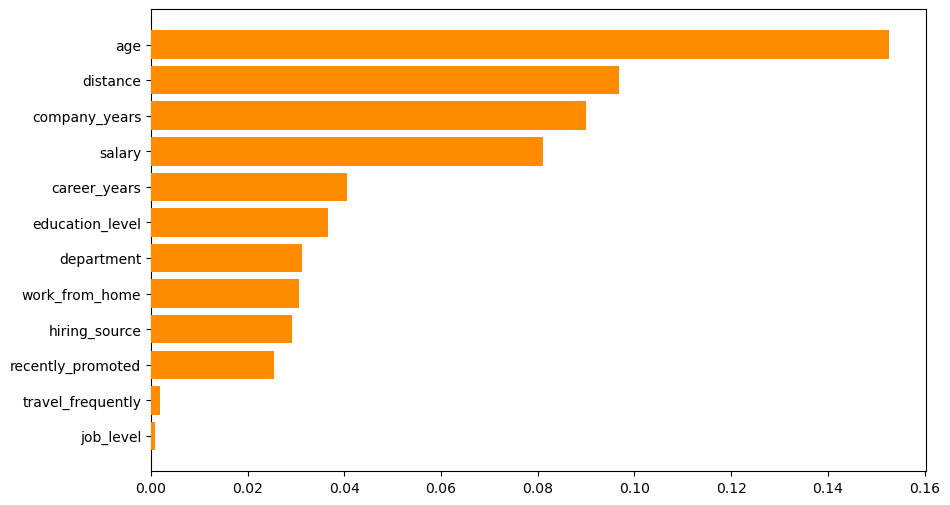

In [45]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=0)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(X.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T, color="darkorange", zorder=3)

From the above figure, we can see that 'job_level' and 'travel_frequently' have little impact on the target leave, so we choose to delete them. After multiple tests, we found that 'hiring_source', 'recently_promoted', and 'work_from_home' can also be deleted because they have little impact on accuracy. However, deleting them can greatly improve the performance of training.

In [47]:
df = df.drop(columns=['job_level', 'travel_frequently','hiring_source','recently_promoted', 'work_from_home'])
df.head()

,department,age,salary,company_years,career_years,education_level,distance,leave
employee_id,,,,,,,,
EMP0310,IT,37,105129.0,10,10.0,Undergrad Degree,3,False
EMP1273,Finance,61,31902.0,1,13.0,Undergrad Degree,39,False
EMP1372,Finance,29,33196.0,1,1.0,Undergrad Degree,9,True
EMP1208,Finance,29,32885.0,1,6.0,Undergrad Degree,3,True
EMP0188,HR,43,50859.0,17,17.0,Secondary,23,False


In [48]:
le = LabelEncoder()
X = df.drop(columns=["leave"])
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

y = df['leave']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HistGradientBoostingClassifier()
model.fit(X_train,y_train)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.8433734939759037


After testing, we found that our accuracy dropped by 1% after deleting those elements. I think this is within an acceptable range because our efficiency will be greatly improved after deleting these elements.

In this assignment, we analyzed the employee dataset in the file employees.csv and predicted whether an employee would leave or stay based on various features such as demographics and job characteristics. First, we characterized and preprocessed the data. To facilitate our subsequent analysis, we processed some missing and duplicate values. Then we analyzed the data to analyze the relationship between the value of the target feature "leave" and each categorical and numerical feature in the data. Finally, we used HistGradientBoostingClassifier to train the model and make predictions. Then we identified some features that could be removed from the dataset without losing performance, and removed them and retested.